# Assignment 2 - Regression, Logical Regression, and ANNs

In [1]:
#Importing libraries
from sklearn import datasets, linear_model, model_selection, __version__
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## 2.1 Linear Regression with Scikit-learn on Linnerud dataset

In [2]:
#Code for understanding the data
data = datasets.load_linnerud()
print(list(data.target_names))
print(list(data.feature_names))

['Weight', 'Waist', 'Pulse']
['Chins', 'Situps', 'Jumps']


In [3]:
X, y = datasets.load_linnerud(return_X_y=True)
X = X[:, np.newaxis,1]
y = y[:, np.newaxis,1]


In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33)

In [5]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
# predictions on test data
y_pred = model.predict(X_test)
print(y_pred)

[[32.04304327]
 [32.82102026]
 [34.96045697]
 [36.90539944]
 [36.3219167 ]
 [34.68816502]
 [32.82102026]]


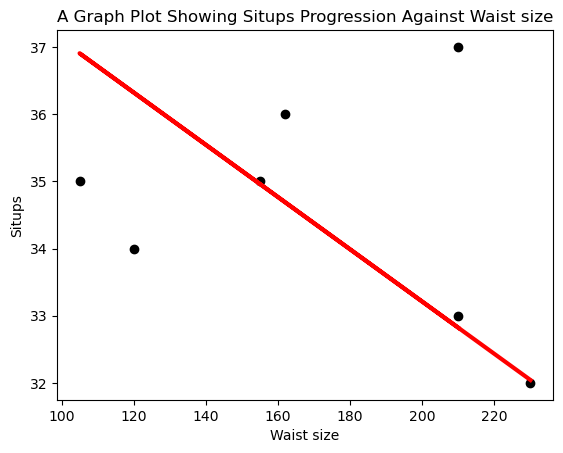

In [7]:
# plot the X_test and y_pred values
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.xlabel('Waist size')
plt.ylabel('Situps')
plt.title('A Graph Plot Showing Situps Progression Against Waist size')
plt.show()

In [8]:
mse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(y_pred)*100:3.3}%)')

Mean error: 2.01 (5.84%)


### Making it as polynominal

In [9]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [10]:
poly_features = poly.fit_transform(X.reshape(-1, 1))

In [11]:
poly_reg_model = LinearRegression()

In [12]:
poly_reg_model.fit(poly_features, y)

LinearRegression()

In [13]:
y_predicted = poly_reg_model.predict(poly_features)


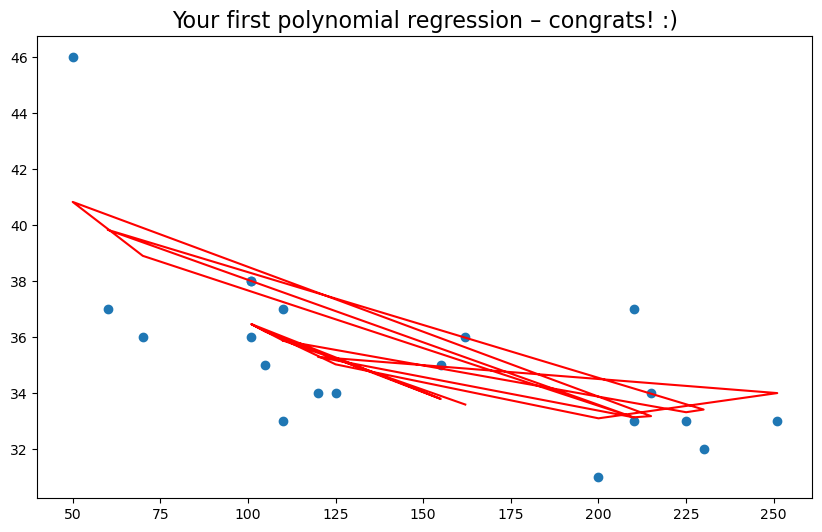

In [14]:
plt.figure(figsize=(10, 6))
plt.title("Your first polynomial regression – congrats! :)", size=16)
plt.scatter(X, y)
plt.plot(X, y_predicted, c="red")
plt.show()

## 2.2 Logistic Regression 